In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("taxifare_updata.csv")
data.head()

,fare_amount,fare_class,passenger_count,year,month,day,hours,minutes,second,daynight,total_dist
0,6.5,0,1,2010,4,19,4,17,56,0,2.126312
1,6.9,0,1,2010,4,17,11,43,53,0,1.392307
2,10.1,1,2,2010,4,17,7,23,26,0,3.326763
3,8.9,0,1,2010,4,11,17,25,3,1,1.864129
4,19.7,1,1,2010,4,16,22,19,1,1,7.231321


In [3]:
data.isnull().values.any()

False

In [4]:
# Split data into dependent feature and Independent feature
X = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
# split the data into training and Validation set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [6]:
# scaling the data using standardscalar
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

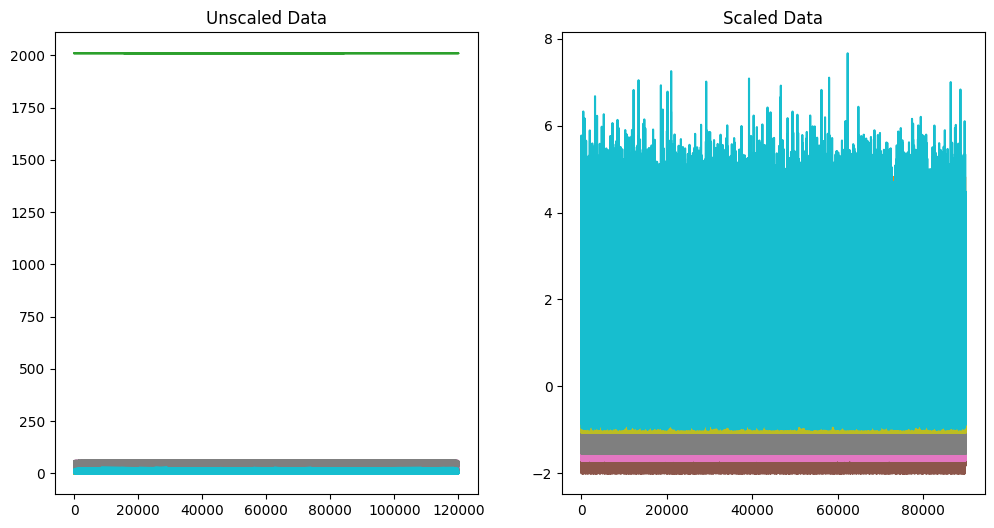

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(x_train)
plt.title("Unscaled Data")

plt.subplot(1,2,2)
plt.plot(x_train_scaled)
plt.title("Scaled Data")
plt.show()

In [10]:
from tpot import TPOTRegressor
tpot = TPOTRegressor()
tpot.fit(x_train_scaled,y_train)
print(tpot.score(x_test_scaled,y_test))
tpot.export('tpot_taxifaredocs_pipeline.py')

-6.296492321786687


In [12]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('taxifare_updata.csv', sep=',', dtype=np.float64)
features = tpot_data.drop('fare_amount', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['fare_amount'], random_state=None)

In [14]:
exported_pipeline = ExtraTreesRegressor(bootstrap=True, max_features=0.8, min_samples_leaf=17, min_samples_split=19, n_estimators=100)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)

In [15]:
results

array([12.53690219,  6.2305    ,  8.06074037, ...,  4.38327333,
        8.01026587, 14.43678854])

In [19]:
results.squeeze()

array([12.53690219,  6.2305    ,  8.06074037, ...,  4.38327333,
        8.01026587, 14.43678854])